## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
#!pip install datasets

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("emotion")

# Access the 'train' split
train = dataset['train']
validation = dataset['validation']
test = dataset['test']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [4]:
def get_tweet(data):
    # Define a dictionary mapping label indices to emotion labels
    emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

    # Extract tweets and label indices from the dataset
    tweets = [x['text'] for x in data]
    label_indices = [x['label'] for x in data]

    # Convert label indices to emotion labels using the dictionary
    labels = [emotion_labels[index] for index in label_indices]

    return tweets, labels


In [5]:
tweets, labels = get_tweet(train)

In [6]:
tweets[1], labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [9]:
tokenizer.texts_to_sequences(tweets[1])

[[2],
 [],
 [1541],
 [7],
 [1726],
 [],
 [2952],
 [2229],
 [],
 [1997],
 [1794],
 [2229],
 [93],
 [],
 [1997],
 [1550],
 [1550],
 [8884],
 [2],
 [1726],
 [2952],
 [],
 [90],
 [2229],
 [],
 [6051],
 [2229],
 [1871],
 [1550],
 [8884],
 [1550],
 [90],
 [90],
 [],
 [43],
 [2229],
 [],
 [90],
 [2229],
 [],
 [669],
 [7],
 [93],
 [1726],
 [1550],
 [669],
 [],
 [6051],
 [2229],
 [1871],
 [1550],
 [1997],
 [966],
 [8884],
 [],
 [6050],
 [966],
 [90],
 [43],
 [],
 [1997],
 [1794],
 [2229],
 [93],
 [],
 [1166],
 [1550],
 [2],
 [1726],
 [2952],
 [],
 [7],
 [1794],
 [2229],
 [966],
 [1726],
 [669],
 [],
 [90],
 [2229],
 [93],
 [1550],
 [2229],
 [1726],
 [1550],
 [],
 [2008],
 [6051],
 [2229],
 [],
 [1541],
 [7],
 [1794],
 [1550],
 [90],
 [],
 [7],
 [1726],
 [669],
 [],
 [2],
 [90],
 [],
 [7],
 [2008],
 [7],
 [2464],
 [1550]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

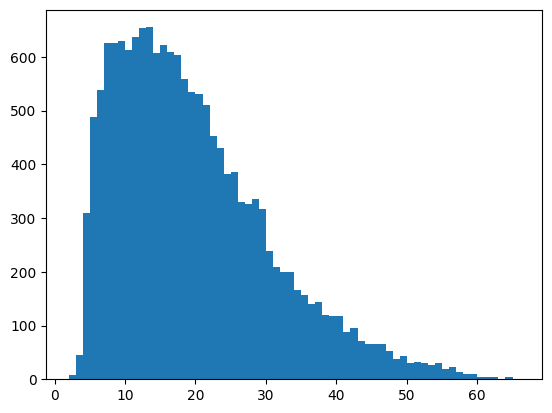

In [10]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [11]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [13]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [14]:
padded_train_seq[1]

array([   2,   40,  101,   60,    8,   15,  494,    5,   15, 3496,  553,
         32,   60,   61,  128,  148,   76, 1480,    4,   22, 1255,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [15]:
classes = set(labels)
print(classes)

{'love', 'surprise', 'fear', 'anger', 'sadness', 'joy'}


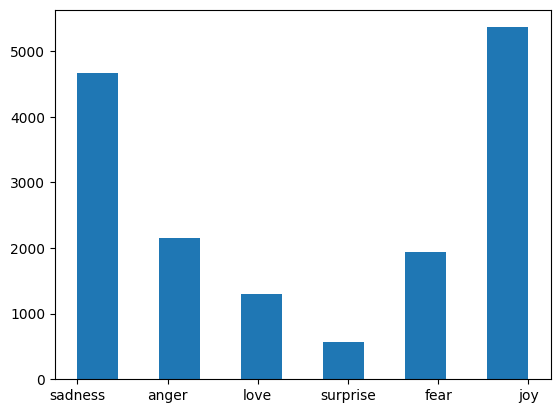

In [16]:
plt.hist(labels, bins = 11)
plt.show()

In [17]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in classes_to_index.items())

In [18]:
classes_to_index

{'love': 0, 'surprise': 1, 'fear': 2, 'anger': 3, 'sadness': 4, 'joy': 5}

In [19]:
index_to_class

{0: 'love', 1: 'surprise', 2: 'fear', 3: 'anger', 4: 'sadness', 5: 'joy'}

In [20]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [21]:
train_labels = names_to_ids(labels)
print(train_labels[0])

4


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [24]:
val_tweets, val_labels = get_tweet(validation)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [25]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 4)

In [26]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data = (val_seq, val_labels),
    epochs = 20,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 40s 54ms/step - loss: 1.3766 - accuracy: 0.4479 - val_loss: 0.9921 - val_accuracy: 0.6465
Epoch 2/20
500/500 [==============================] - 9s 17ms/step - loss: 0.6765 - accuracy: 0.7695 - val_loss: 0.6124 - val_accuracy: 0.7980
Epoch 3/20
500/500 [==============================] - 9s 19ms/step - loss: 0.3582 - accuracy: 0.8862 - val_loss: 0.5939 - val_accuracy: 0.7890
Epoch 4/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2466 - accuracy: 0.9288 - val_loss: 0.4359 - val_accuracy: 0.8730
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1811 - accuracy: 0.9473 - val_loss: 0.4286 - val_accuracy: 0.8775
Epoch 6/20
500/500 [==============================] - 8s 15ms/step - loss: 0.1383 - accuracy: 0.9600 - val_loss: 0.4621 - val_accuracy: 0.8785
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.1090 - accuracy: 0.9688 - val_loss: 0.3921 - val_accuracy: 0.892

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
_ = model.evaluate(test_seq, test_labels)

In [ ]:
import random
i = random.randint(0, len(test_labels)-1)
print('sentence:',  test_tweets[i])
print('original Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)

In [ ]:
pred_probs = model.predict(test_seq)
pred_classes = pred_probs.argmax(axis=-1)

In [ ]:
show_confusion_matrix(test_labels, pred_classes, list(classes))